In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv2
from deepface import DeepFace
from sklearn.model_selection import train_test_split

## Detecting face in image

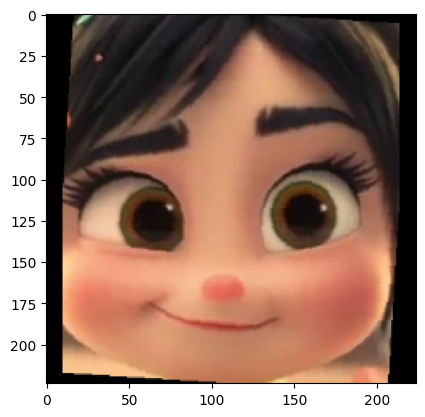

In [2]:
# Note: ssd and retinaface can detect cartoon face.
backends = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'retinaface', 
  'mediapipe'
]

detected_face = DeepFace.extract_faces("./vanellope.jpg", detector_backend = backends[4])
plt.imshow(detected_face[0]['face'])

## Feature extraction

In [3]:
df = pd.read_csv("./fer2013.csv")
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [4]:
df.describe(include="all")

,emotion,pixels,Usage
count,35887.000000,35887,35887
unique,NaN,34034,3
top,NaN,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,Training
freq,NaN,12,28709
mean,3.323265,NaN,NaN
std,1.873819,NaN,NaN
min,0.000000,NaN,NaN
25%,2.000000,NaN,NaN
50%,3.000000,NaN,NaN
75%,5.000000,NaN,NaN


In [5]:
df.select_dtypes(include='number').describe(include="all")

,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [7]:
df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split(), dtype="float32"))

In [8]:
pixels = pixels.reshape(-1, 48, 48, 1)

,emotion,pixels,Usage
0,0,"[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63....",Training
1,0,"[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 111...",Training
2,2,"[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 161...",Training
3,4,"[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20....",Training
4,6,"[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Training
...,...,...,...
35882,6,"[50.0, 36.0, 17.0, 22.0, 23.0, 29.0, 33.0, 39....",PrivateTest
35883,3,"[178.0, 174.0, 172.0, 173.0, 181.0, 188.0, 191...",PrivateTest
35884,0,"[17.0, 17.0, 16.0, 23.0, 28.0, 22.0, 19.0, 17....",PrivateTest
35885,3,"[30.0, 28.0, 28.0, 29.0, 31.0, 30.0, 42.0, 68....",PrivateTest


In [9]:
# df.describe(include="all")

In [10]:
def get_emotion(number: int, index=312):
    # 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral.
    return df[df["emotion"] == number].iloc[index]['pixels'].reshape(48, 48)

In [11]:
angry = get_emotion(0)
disgust = get_emotion(1)
fear = get_emotion(2)
happy = get_emotion(3)
sad = get_emotion(4)
surprise = get_emotion(5)
neutral = get_emotion(6)

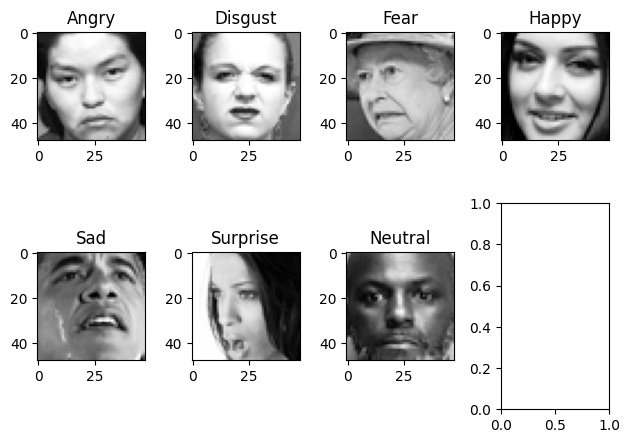

In [12]:
# Create the main figure and subplots
fig, axes = plt.subplots(2, 4)

# Display images in each subplot using imshow
axes[0, 0].imshow(angry, cmap="Greys_r")
axes[0, 1].imshow(disgust, cmap="Greys_r")
axes[0, 2].imshow(fear, cmap="Greys_r")
axes[0, 3].imshow(happy, cmap="Greys_r")
axes[1, 0].imshow(sad, cmap="Greys_r")
axes[1, 1].imshow(surprise, cmap="Greys_r")
axes[1, 2].imshow(neutral, cmap="Greys_r")

# Optionally customize each subplot
axes[0, 0].set_title('Angry')
axes[0, 1].set_title('Disgust')
axes[0, 2].set_title('Fear')
axes[0, 3].set_title('Happy')
axes[1, 0].set_title('Sad')
axes[1, 1].set_title('Surprise')
axes[1, 2].set_title('Neutral')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
np.unique(df["Usage"])

array(['PrivateTest', 'PublicTest', 'Training'], dtype=object)

In [14]:
training_data = df[df['Usage'] == 'Training']
validate_data = df[df['Usage'] == 'PublicTest']
test_data = df[df['Usage'] == 'PrivateTest']

# Print the number of samples in each category
print("Training samples:", len(training_data))
print("Public test(Validation) samples:", len(validate_data))
print("Private test(Test) samples:", len(test_data))

Training samples: 28709
Public test(Validation) samples: 3589
Private test(Test) samples: 3589


In [15]:
X_train, y_train = training_data["pixels"], training_data["emotion"]
X_valid, y_valid = validate_data["pixels"], validate_data["emotion"]
X_test, y_test = test_data["pixels"], test_data["emotion"]

In [16]:
X_train

0        [70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63....
1        [151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 111...
2        [231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 161...
3        [24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20....
4        [4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               ...                        
28704    [84.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85....
28705    [114.0, 112.0, 113.0, 113.0, 111.0, 111.0, 112...
28706    [74.0, 81.0, 87.0, 89.0, 95.0, 100.0, 98.0, 93...
28707    [222.0, 227.0, 203.0, 90.0, 86.0, 90.0, 84.0, ...
28708    [195.0, 199.0, 205.0, 206.0, 205.0, 203.0, 206...
Name: pixels, Length: 28709, dtype: object

In [17]:
X_train[0].shape

(2304,)

In [21]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

width, height = 48, 48
# X_train = X_train.reshape(len(X_train),height,width)
# X_test = X_test.reshape(len(X_test),height,width)
# X_train = np.expand_dims(X_train,3)
# X_test = np.expand_dims(X_test,3)
cnn_model = Sequential()
cnn_model.add(Conv2D(5000, kernel_size=(4, 4), activation='relu', padding='same', input_shape = (width, height, 1)))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(3, 3), strides=(4, 4)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())
cnn_model.add(Dense(2000, activation='relu'))
cnn_model.add(Dropout(0.2))gg
cnn_model.add(Dense(5, activation='softmax'))
checkpoint = ModelCheckpoint('best_cnn_model.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')
cnn_model.compile(loss=categorical_crossentropy, optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])
cnn_history = cnn_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[checkpoint], 
validation_data=(X_test, y_test),shuffle=True)
cnn_model.save('cnn_model.h5')

NameError: name 'batch_size' is not defined

In [22]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


## Feature Classification

In [ ]:
a